# 3.5 クラスタリング
クラスタリングは、データセットを「クラスタ」と呼ばれるグループに分割するタスク  
目的は、同じクラスタ内のデータが類似していて、異なるクラスタのデーは異なるようにデータを分割すること

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
%matplotlib notebook
%matplotlib inline

## 3.5.1 k-meansクラスタリング
最も単純なクラスタリングアルゴリズム  
データのある領域を代表するようなクラスタ重心を見つけようとする  
1. 個々のデータポイントを最寄りのクラスタ重心に割り当てる
2. 個々のクラスタ重心をその点に割り当てられたデータポイントの平均に設定する
3. データポイントの割り当てが変化しなくなったら終了

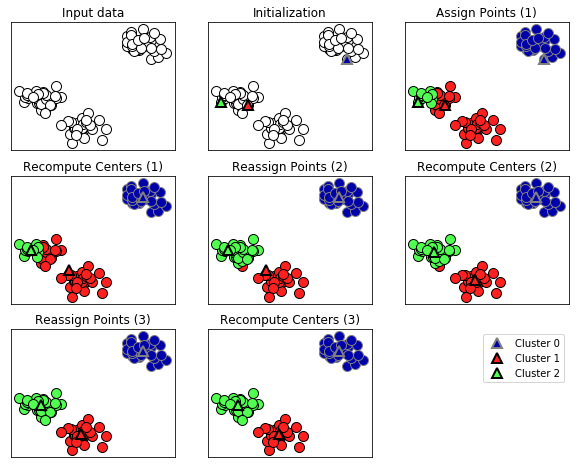

In [2]:
# 入力データと k-means アルゴリズムの3ステップ
mglearn.plots.plot_kmeans_algorithm()

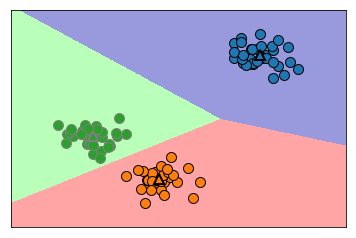

In [4]:
# 学習して得られたクラスタセンタの境界を表示
mglearn.plots.plot_kmeans_boundaries()

In [6]:
'''
scikit-learn の k-means を使ってみる
クラスタ数はデフォルトは 8 になる（意味はない）
'''

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 合成2次元データを作る
X, y = make_blobs(random_state=1)

# クラスタリングモデルを作る
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
'''
個々の訓練データポイントに対して、クラスタラベルが割り当てられる
割り当てられたラベルの確認
3つのクラスタを作るように指定したのでクラスタラベルは0から2
'''

print("Cluster memberships: \n{}".format(kmeans.labels_))

Cluster memberships: 
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [8]:
'''
predictメソッドを用いて、新しいデータポイントにクラスタを割り当てる
訓練セットに対して実行すると、labels_と同じ結果になる
'''

print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


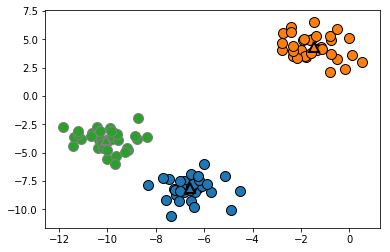

In [9]:
'''
2次元のトイデータセットをプロット
'''

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

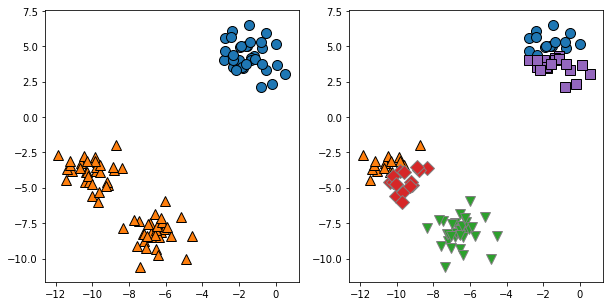

In [10]:
'''
クラスタセンタの数を2に指定した場合と5にした場合
'''

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# クラスタセンタを2つに指定
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# クラスタセンタを5つに指定
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

### 3.5.1.1 k-meansがうまくいかない場合

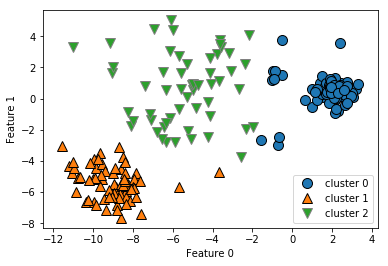

In [12]:
'''
真ん中の密でない領域に、クラスタ0とクラスタ1も含まれてしまった
クラスタ境界をクラスタセンタのちょうど中間に引くため
'''

X_varied, y_varied = make_blobs(n_samples=200,
                                                           cluster_std=[1.0, 2.5, 0.5],
                                                           random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

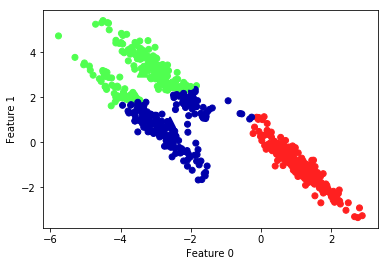

In [13]:
'''
見た感じ明らかに3つに分類できる2次元データセットを示す
k-meansは最も近いクラスタセンタへの距離しか考慮しないので、このようなデータを取り扱えない
丸くないクラスタを識別できない
'''

# ランダムにクラスタデータを作成
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 対角線方向に引き伸ばす
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# データポイントを3つにクラスタリング
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                    marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

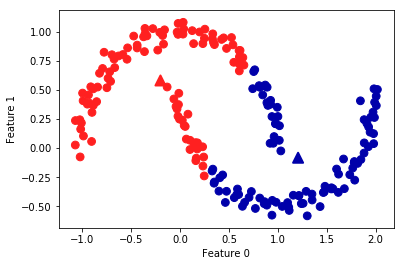

In [14]:
'''
クラスタが複雑な形の場合にも上手く機能しない
two_moonsデータセットの例
'''

# 合成データセットtwo_moonsデータ作成
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 2つのクラスタにクラスタ分類
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                    marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 3.5.1.2 ベクトル量子化、もしくは成分分解としてのk-means